In [1]:
import pandas as pd
ds = pd.read_csv('anthems.csv')


In [2]:
# dataset_url = 'https://www.kaggle.com/datasets/lucasturtle/national-anthems-of-the-world'

In [3]:
ds

,Country,Alpha-2,Alpha-3,Continent,Anthem
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea..."
...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,O defenders of the Homeland! Rally around to t...
186,Uganda,UG,UGA,Africa,"Oh Uganda! May God uphold Thee, We lay our fut..."
187,Western Sahara,EH,ESH,Africa,"O sons of the Sahara! In the battlefield, you ..."
188,Zambia,ZM,ZMB,Africa,"Stand and sing of Zambia, proud and free, Land..."


In [4]:
ds['Anthem']

0      Around our flag we stand united, With one wish...
1      Our Fatherland, free, independent, That has fo...
2      Land of mountains, land by the river, Land of ...
3      Azerbaijan, Azerbaijan! The glorious Fatherlan...
4      We, Belarusians, are peaceful people, Wholehea...
                             ...                        
185    O defenders of the Homeland! Rally around to t...
186    Oh Uganda! May God uphold Thee, We lay our fut...
187    O sons of the Sahara! In the battlefield, you ...
188    Stand and sing of Zambia, proud and free, Land...
189    Oh lift high the banner, the flag of Zimbabwe ...
Name: Anthem, Length: 190, dtype: object

In [5]:
g = ds.groupby('Continent')

In [6]:
for continent,country in g:
    print(continent)
    print(country)

Africa
                          Country Alpha-2 Alpha-3 Continent  \
134                       Algeria      DZ     DZA    Africa   
135                        Angola      AO     AGO    Africa   
136                         Benin      BJ     BEN    Africa   
137                      Botswana      BW     BWA    Africa   
138                  Burkina Faso      BF     BFA    Africa   
139                       Burundi      BI     BDI    Africa   
140                      Cameroon      CM     CMR    Africa   
141                    Cape Verde      CV     CPV    Africa   
142      Central African Republic      CF     CAF    Africa   
143                          Chad      TD     TCD    Africa   
144                       Comoros      KM     COM    Africa   
145  Democratic Republic of Congo      CD     COD    Africa   
146                      Djibouti      DJ     DJI    Africa   
147                         Egypt      EG     EGY    Africa   
148             Equatorial Guinea      GQ     GN

In [7]:
ds['Anthem1'] = ''

In [8]:
ds

,Country,Alpha-2,Alpha-3,Continent,Anthem,Anthem1
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",
...,...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,O defenders of the Homeland! Rally around to t...,
186,Uganda,UG,UGA,Africa,"Oh Uganda! May God uphold Thee, We lay our fut...",
187,Western Sahara,EH,ESH,Africa,"O sons of the Sahara! In the battlefield, you ...",
188,Zambia,ZM,ZMB,Africa,"Stand and sing of Zambia, proud and free, Land...",


# Removing the stop words

In [9]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
#text = "When I first met her she was very quiet. She remained quiet during the entire two hour long journey from Stony Brook to New York."
for i in range(len(ds['Anthem'])):
    words = [word for word in ds['Anthem'][i].split() if word.lower() not in sw_nltk]
    ds['Anthem1'][i] = " ".join(words)
    

'''new_text = " ".join(words)
print(new_text)
print("Old length: ", len(text))
print("New length: ", len(new_text))'''
print(words)

['Oh', 'lift', 'high', 'banner,', 'flag', 'Zimbabwe', 'symbol', 'freedom', 'proclaiming', 'victory;', 'praise', "heroes'", 'sacrifice,', 'vow', 'keep', 'land', 'foes;', 'may', 'Almighty', 'protect', 'bless', 'land.', 'Oh', 'lovely', 'Zimbabwe,', 'wondrously', 'adorned', 'mountains,', 'rivers', 'cascading,', 'flowing', 'free;', 'May', 'rain', 'abound,', 'fertile', 'fields;', 'May', 'fed,', 'labour', 'blessed;', 'may', 'Almighty', 'protect', 'bless', 'land.', 'Oh', 'God,', 'beseech', 'Thee', 'bless', 'native', 'land;', 'land', 'fathers', 'bestowed', 'upon', 'us', 'all;', 'Zambezi', 'Limpopo', 'May', 'leaders', 'exemplary;', 'may', 'Almighty', 'protect', 'bless', 'land.']


In [11]:
ds

,Country,Alpha-2,Alpha-3,Continent,Anthem,Anthem1
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...","Around flag stand united, one wish one goal, s..."
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...","Fatherland, free, independent, centuries lived..."
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...","Land mountains, land river, Land fields, land ..."
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...","Azerbaijan, Azerbaijan! glorious Fatherland va..."
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...","We, Belarusians, peaceful people, Wholehearted..."
...,...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,O defenders of the Homeland! Rally around to t...,defenders Homeland! Rally around glory time! b...
186,Uganda,UG,UGA,Africa,"Oh Uganda! May God uphold Thee, We lay our fut...","Oh Uganda! May God uphold Thee, lay future thy..."
187,Western Sahara,EH,ESH,Africa,"O sons of the Sahara! In the battlefield, you ...","sons Sahara! battlefield, torch holders long r..."
188,Zambia,ZM,ZMB,Africa,"Stand and sing of Zambia, proud and free, Land...","Stand sing Zambia, proud free, Land work joy u..."


# Removing all the punctuation marks

In [12]:
import re
for i in range(len(ds['Anthem1'])):
    ds['Anthem1'][i] = re.sub(r'[^\w\s]', '',ds['Anthem1'][i] )


In [13]:
ds

,Country,Alpha-2,Alpha-3,Continent,Anthem,Anthem1
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",Around flag stand united one wish one goal sac...
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",Fatherland free independent centuries lived su...
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",Land mountains land river Land fields land cat...
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",Azerbaijan Azerbaijan glorious Fatherland valo...
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",We Belarusians peaceful people Wholeheartedly ...
...,...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,O defenders of the Homeland! Rally around to t...,defenders Homeland Rally around glory time blo...
186,Uganda,UG,UGA,Africa,"Oh Uganda! May God uphold Thee, We lay our fut...",Oh Uganda May God uphold Thee lay future thy h...
187,Western Sahara,EH,ESH,Africa,"O sons of the Sahara! In the battlefield, you ...",sons Sahara battlefield torch holders long roa...
188,Zambia,ZM,ZMB,Africa,"Stand and sing of Zambia, proud and free, Land...",Stand sing Zambia proud free Land work joy uni...


In [14]:
ds['Anthem2'] = ''

In [15]:
ds

,Country,Alpha-2,Alpha-3,Continent,Anthem,Anthem1,Anthem2
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",Around flag stand united one wish one goal sac...,
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",Fatherland free independent centuries lived su...,
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",Land mountains land river Land fields land cat...,
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",Azerbaijan Azerbaijan glorious Fatherland valo...,
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",We Belarusians peaceful people Wholeheartedly ...,
...,...,...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,O defenders of the Homeland! Rally around to t...,defenders Homeland Rally around glory time blo...,
186,Uganda,UG,UGA,Africa,"Oh Uganda! May God uphold Thee, We lay our fut...",Oh Uganda May God uphold Thee lay future thy h...,
187,Western Sahara,EH,ESH,Africa,"O sons of the Sahara! In the battlefield, you ...",sons Sahara battlefield torch holders long roa...,
188,Zambia,ZM,ZMB,Africa,"Stand and sing of Zambia, proud and free, Land...",Stand sing Zambia proud free Land work joy uni...,


# Stemming the words and extracting root word

In [16]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()
for i in range(len(ds['Anthem1'])):
    #ds['Anthem1'][i] = re.sub(r'[^\w\s]', '',ds['Anthem1'][i] )  
    sentence = ds['Anthem1'][i]
    words = word_tokenize(sentence)
    aa = []  
    for w in words:
        aa.append(ps.stem(w))
    ds['Anthem2'][i] = ' '.join(map(str, aa))
    




In [17]:
ds

,Country,Alpha-2,Alpha-3,Continent,Anthem,Anthem1,Anthem2
0,Albania,AL,ALB,Europe,"Around our flag we stand united, With one wish...",Around flag stand united one wish one goal sac...,around flag stand unit one wish one goal sacr ...
1,Armenia,AM,ARM,Europe,"Our Fatherland, free, independent, That has fo...",Fatherland free independent centuries lived su...,fatherland free independ centuri live summon s...
2,Austria,AT,AUT,Europe,"Land of mountains, land by the river, Land of ...",Land mountains land river Land fields land cat...,land mountain land river land field land cathe...
3,Azerbaijan,AZ,AZE,Europe,"Azerbaijan, Azerbaijan! The glorious Fatherlan...",Azerbaijan Azerbaijan glorious Fatherland valo...,azerbaijan azerbaijan gloriou fatherland valor...
4,Belarus,BY,BLR,Europe,"We, Belarusians, are peaceful people, Wholehea...",We Belarusians peaceful people Wholeheartedly ...,we belarusian peac peopl wholeheartedli devot ...
...,...,...,...,...,...,...,...
185,Tunisia,TN,TUN,Africa,O defenders of the Homeland! Rally around to t...,defenders Homeland Rally around glory time blo...,defend homeland ralli around glori time blood ...
186,Uganda,UG,UGA,Africa,"Oh Uganda! May God uphold Thee, We lay our fut...",Oh Uganda May God uphold Thee lay future thy h...,oh uganda may god uphold thee lay futur thi ha...
187,Western Sahara,EH,ESH,Africa,"O sons of the Sahara! In the battlefield, you ...",sons Sahara battlefield torch holders long roa...,son sahara battlefield torch holder long road ...
188,Zambia,ZM,ZMB,Africa,"Stand and sing of Zambia, proud and free, Land...",Stand sing Zambia proud free Land work joy uni...,stand sing zambia proud free land work joy uni...


In [18]:
ds['Anthem2'][97] # anthem of india

'thou art ruler mind peopl dispens india destini thi name rous heart punjab sindh gujarat maratha dravida odisha bengal echo hill vindhya himalaya mingl music ganga yamuna chant wave indian sea pray thi bless sing thi prais save peopl wait thi hand thou dispens india destini victori victori victori thee'

# The vectorization of sremmed words
## To apply TFIDF in this process,this willl give numerical values to text data

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
#vectors = vectorizer.fit_transform([ds['Anthem2'][97] , ds['Anthem2'][98],ds['Anthem2'][99]])
vectors = vectorizer.fit_transform(list(ds['Anthem2'][i] for i in range(len(ds['Anthem2']))))

feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
df

,4th,abandon,abanyarwanda,abid,abl,ablaz,abound,abov,abrandish,absolut,...,zambia,zeal,zealand,zealou,zenith,zimbabw,zion,ãââœ,ãâålive,ãƒârpãƒâd
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.150673,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
186,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
187,0.0,0.09716,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
188,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.690916,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [21]:
s = df.max()
# what is the maximum available values

In [22]:
s

4th             0.093751
abandon         0.097160
abanyarwanda    0.125106
abid            0.244799
abl             0.138803
                  ...   
zimbabw         0.285020
zion            0.452997
ãââœ            0.553747
ãâålive         0.139535
ãƒârpãƒâd       0.079408
Length: 2924, dtype: float64

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=5, n_init=20, random_state=1)

kmeans.fit(df)

KMeans(init='random', n_clusters=5, n_init=20, random_state=1)

In [24]:
# Here we have derrived 5 clusters from 0 to 4

In [25]:
kmeans.labels_

array([4, 4, 0, 2, 4, 4, 1, 0, 0, 2, 0, 0, 4, 4, 4, 3, 4, 2, 3, 2, 3, 3,
       4, 4, 0, 3, 0, 4, 0, 0, 2, 4, 4, 3, 3, 4, 2, 3, 4, 4, 4, 2, 0, 2,
       3, 3, 2, 4, 3, 4, 0, 4, 4, 0, 3, 3, 0, 2, 4, 3, 3, 0, 3, 1, 4, 2,
       0, 3, 0, 0, 4, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 4, 0, 4, 0, 4,
       0, 2, 0, 1, 3, 4, 2, 0, 1, 2, 0, 2, 3, 2, 2, 3, 0, 0, 0, 4, 0, 1,
       4, 4, 0, 4, 0, 1, 0, 0, 0, 2, 0, 3, 0, 1, 2, 3, 4, 3, 4, 3, 0, 4,
       3, 4, 4, 4, 3, 0, 4, 0, 2, 3, 0, 4, 4, 0, 0, 2, 4, 3, 4, 4, 1, 2,
       1, 3, 2, 1, 0, 0, 2, 4, 0, 4, 0, 2, 3, 4, 0, 0, 4, 0, 0, 3, 3, 3,
       4, 2, 0, 0, 0, 3, 2, 4, 2, 3, 0, 0, 0, 0])

In [26]:
ds['cluster'] = kmeans.labels_

In [27]:
ds[['Country','cluster']]

,Country,cluster
0,Albania,4
1,Armenia,4
2,Austria,0
3,Azerbaijan,2
4,Belarus,4
...,...,...
185,Tunisia,3
186,Uganda,0
187,Western Sahara,0
188,Zambia,0


In [28]:
ds[['Country','cluster']].iloc[124]

Country    Sri Lanka
cluster            2
Name: 124, dtype: object

In [29]:
grouped = ds.groupby('cluster')

In [30]:
for cluster,data in grouped:
    print(cluster)
    print(data)
    


0
            Country Alpha-2 Alpha-3 Continent  \
2           Austria      AT     AUT    Europe   
7          Bulgaria      BG     BGR    Europe   
8           Croatia      HR     HRV    Europe   
10          Czechia      CZ     CZE    Europe   
11          Denmark      DK     DNK    Europe   
..              ...     ...     ...       ...   
180     South Sudan      SS     SSD    Africa   
186          Uganda      UG     UGA    Africa   
187  Western Sahara      EH     ESH    Africa   
188          Zambia      ZM     ZMB    Africa   
189        Zimbabwe      ZW     ZWE    Africa   

                                                Anthem  \
2    Land of mountains, land by the river, Land of ...   
7    Proud Balkan Mountains, next to it the Danube ...   
8    Our beautiful homeland, Oh so fearless and gra...   
10   Where my home is, where my home is, Water roar...   
11   There is a lovely country it stands with broad...   
..                                                 ...   
180

# Now we will generate word cloud for each derrived cluster

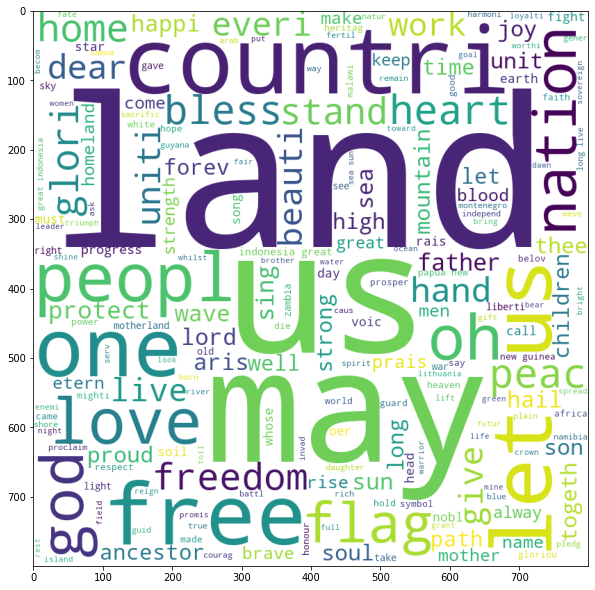

In [31]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd



comment_words = ''
stopwords = set(STOPWORDS)


for val in grouped.get_group(0)['Anthem2']:


    val = str(val)

    # split the value
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                
                stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
#plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


#blue group

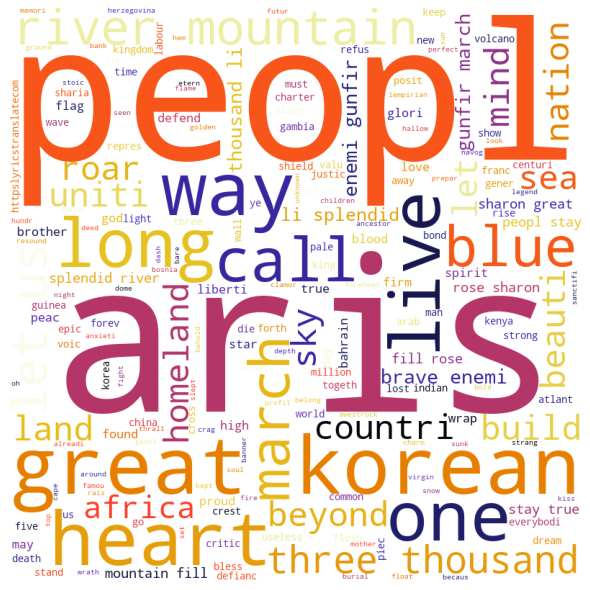

In [32]:
comment_words = ''
stopwords = set(STOPWORDS)


for val in grouped.get_group(1)['Anthem2']:


    val = str(val)

    # split the value
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                colormap = 'CMRmap',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#pink group


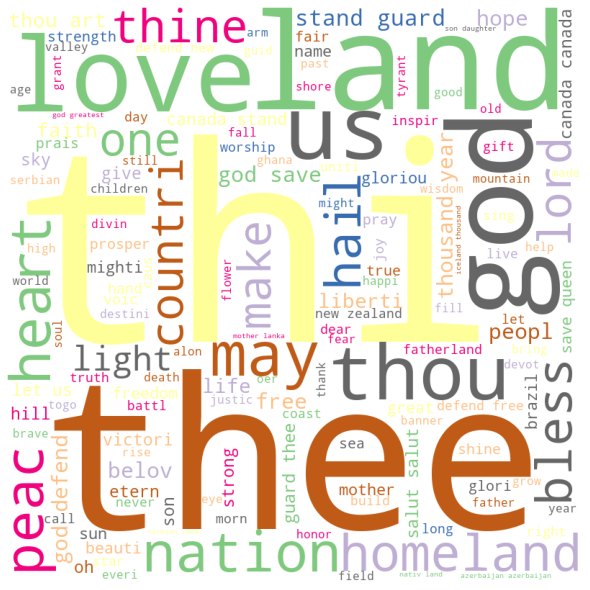

In [33]:
comment_words = ''
stopwords = set(STOPWORDS)


for val in grouped.get_group(2)['Anthem2']:


    val = str(val)

    # split the value
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                colormap = 'Accent',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

#yellow group 

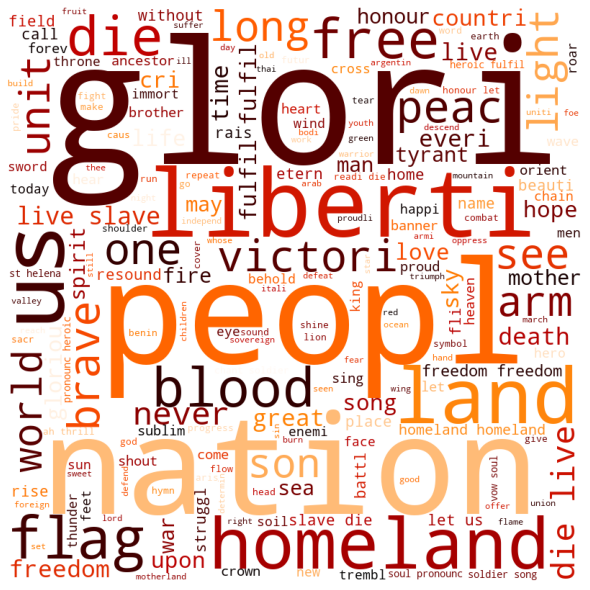

In [34]:
comment_words = ''
stopwords = set(STOPWORDS)


for val in grouped.get_group(3)['Anthem2']:


    val = str(val)

    # split the value
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                colormap = 'gist_heat_r',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##  maroon

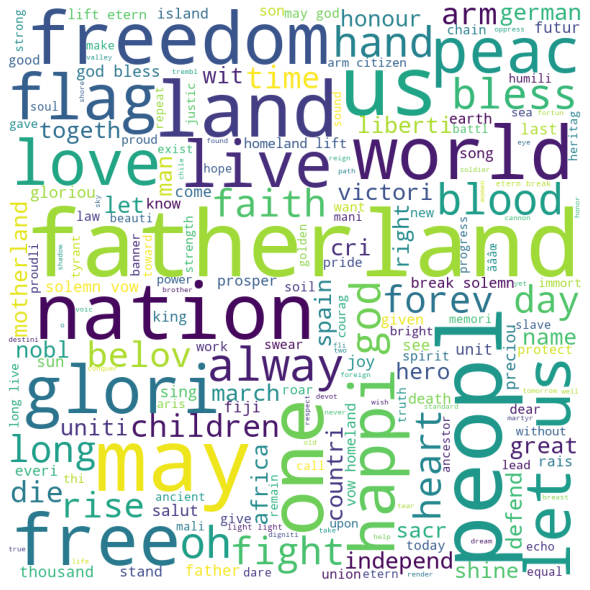

In [35]:
comment_words = ''
stopwords = set(STOPWORDS)


for val in grouped.get_group(4)['Anthem2']:


    val = str(val)

    # split the value
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# green

In [36]:
##  kind as well as Nature

In [37]:


'''
0 Stereotypically patriotic words having characterized their country as father figure (Fatherly patriots) 
1 Have all the words like motherland, nature, love which tend their country as mother (motherly natured cluster) 
2 treats their country as God and show care and love for the country with their people (praise the lord cluster) 
3 tells us about the wars, freedom and sacrifice what they have done (mighty military nations) 
4 show their national unity and love about people with all of their irrespective place but country (patriotic cluster)'''

'\n0 Stereotypically patriotic words having characterized their country as father figure (Fatherly patriots) \n1 Have all the words like motherland, nature, love which tend their country as mother (motherly natured cluster) \n2 treats their country as God and show care and love for the country with their people (praise the lord cluster) \n3 tells us about the wars, freedom and sacrifice what they have done (mighty military nations) \n4 show their national unity and love about people with all of their irrespective place but country (patriotic cluster)'

In [38]:


'''
0 us Bulgaria Austria
1 Bangladesh, Sri Lanka, Russia
2 India, Malaysia
3 China, France
4 Saudi Arabia, Iran'''

'\n0 us Bulgaria Austria\n1 Bangladesh, Sri Lanka, Russia\n2 India, Malaysia\n3 China, France\n4 Saudi Arabia, Iran'

# Compairision of nations with their specific clusters

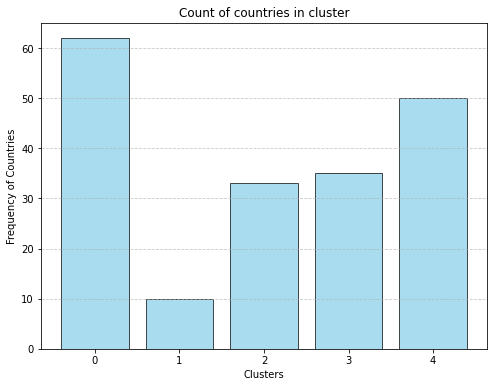

In [39]:
import matplotlib.pyplot as plt
from collections import Counter

labels = list(kmeans.labels_)  
label_counts = Counter(labels)
label_values = list(label_counts.keys())
label_frequencies = list(label_counts.values())

custom_labels = ['Fatherly Patriots', 'Motherly Natured Cluster', 'Praise the Lord Cluster', 'Mighty Military Nations', 'Patriotic Unity']

plt.figure(figsize=(8, 6))
plt.bar(label_values, label_frequencies, color='skyblue', edgecolor='black', alpha=0.7)

plt.xticks(label_values, custom_labels, rotation=45, ha='right')

plt.title('Count of countries in cluster')
plt.xlabel('Clusters')
plt.ylabel('Frequency of Countries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()
